In [25]:
import cv2  # Import OpenCV library
import numpy as np  # Import NumPy library
import matplotlib.pyplot as plt  # Import Matplotlib library for visualization

Adding Gaussian Noises

In [26]:
def add_gaussian_noise(image, noise_factor=0.01):
    # Generate Gaussian noise with mean 0 and standard deviation 1
    noise = np.random.normal(loc=0.0, scale=1.0, size=image.shape)
    # Clip the noisy image to range [0, 1]
    noisy_image = np.clip(image + noise_factor * noise, 0.0, 1.0)
    return noisy_image

In [27]:
# Read RGB image
image_path = '/content/tiger-3198598_1280.jpg'
image = cv2.imread(image_path)  # Read image using OpenCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image = image.astype('float32') / 255.0  # Normalize pixel values to range [0, 1]

# Resize the image
target_height, target_width = 1000, 1000
resized_image = cv2.resize(image, (target_width, target_height))  # Resize image

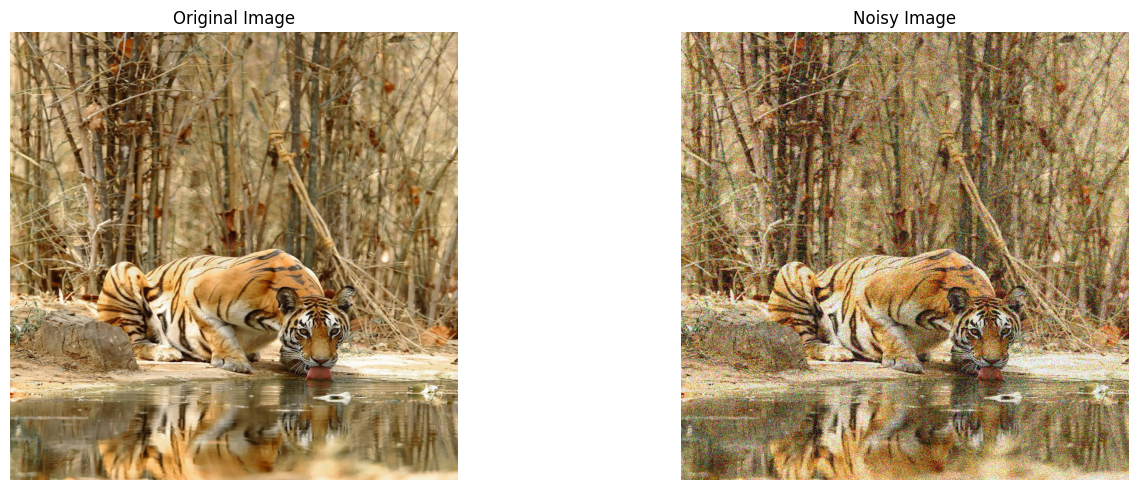

In [28]:
# Add Gaussian noise to the original image
noisy_image = add_gaussian_noise(resized_image, noise_factor=0.2)  # Adjust noise factor

# Visualize the images
plt.figure(figsize=(15, 5))  # Set figure size

# Plot the original image
plt.subplot(1, 2, 1)  # Create subplot for original image
plt.imshow(resized_image)  # Display original image
plt.title('Original Image')  # Set title for subplot
plt.axis('off')  # Turn off axis

# Plot the noisy image
plt.subplot(1, 2, 2)  # Create subplot for noisy image
plt.imshow(noisy_image)  # Display noisy image
plt.title('Noisy Image')  # Set title for subplot
plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

In [29]:
# Filter sizes to apply
filter_sizes = [3, 5, 7, 9]

1 - Average Filter

Purpose: The average filter, also known as the box filter or mean filter, is a simple and commonly used image processing technique used for smoothing or blurring an image.

Operation: The average filter works by replacing each pixel value in the image with the average value of its neighboring pixels. This process effectively reduces noise and removes small-scale details from the image.

Kernel: The average filter uses a square-shaped kernel (also known as the averaging kernel or box kernel) of a specified size. The size of the kernel determines the extent of the smoothing effect. A larger kernel size results in a stronger smoothing effect.

Implementation: To apply the average filter, the kernel is placed over each pixel in the image, and the pixel values within the kernel are averaged. The resulting average value replaces the original pixel value. This process is repeated for every pixel in the image.

Effect: The average filter effectively reduces high-frequency components in the image, such as noise or small-scale details, resulting in a smoother appearance. However, it may also cause blurring, especially around edges and sharp transitions in the image.

Applications: The average filter is commonly used in various image processing tasks, including noise reduction, image smoothing, and preparation of images for further analysis or feature extraction.

Parameters: The main parameter of the average filter is the size of the kernel, which determines the extent of smoothing. Larger kernel sizes result in stronger smoothing effects but may also lead to more blurring.

Overall, the average filter is a simple yet effective technique for smoothing images and reducing noise, making it a fundamental tool in image processing and computer vision applications.

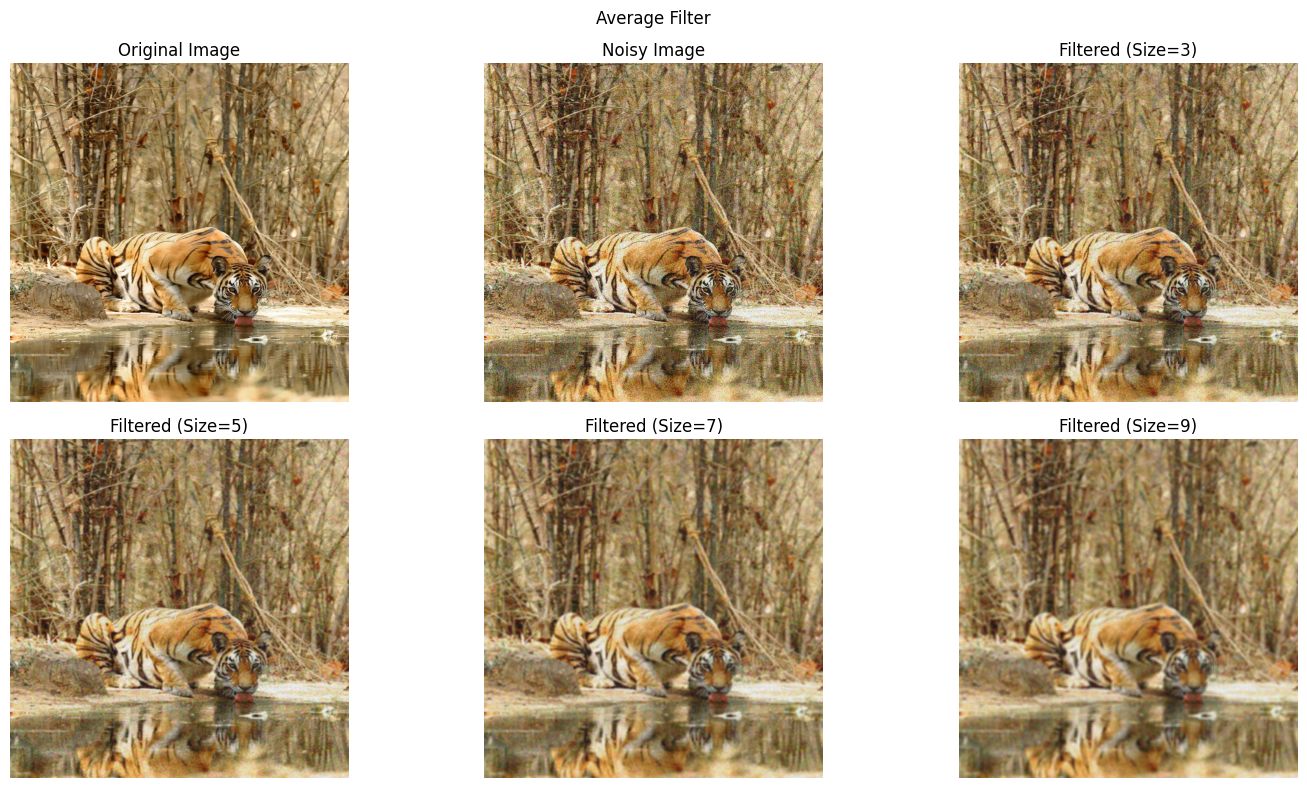

In [30]:
# Visualize the images
plt.figure(figsize=(15, 8))  # Create a figure with specified size

# Plot the original image
plt.subplot(2, 3, 1)  # Create subplot for original image at position (2, 3, 1)
plt.imshow(np.clip(resized_image, 0, 1))  # Display the original image and clip values to [0, 1]
plt.title('Original Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Plot the noisy image
plt.subplot(2, 3, 2)  # Create subplot for noisy image at position (2, 3, 2)
plt.imshow(np.clip(noisy_image, 0, 1))  # Display the noisy image and clip values to [0, 1]
plt.title('Noisy Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Apply average filter with different filter sizes using cv2.filter2D()
for i, filter_size in enumerate(filter_sizes, start=1):  # Loop over each filter size
    # Create the average filter kernel
    kernel = np.ones((filter_size, filter_size), dtype=np.float32) / (filter_size * filter_size)

    # Apply the filter using cv2.filter2D()
    filtered_image = cv2.filter2D(noisy_image, -1, kernel)  # Apply the filter to the noisy image

    # Plot the filtered image
    plt.subplot(2, 3, i + 2)  # Create subplot for filtered image at position (2, 3, i + 2)
    plt.imshow(np.clip(filtered_image, 0, 1))  # Display the filtered image and clip values to [0, 1]
    plt.title(f'Filtered (Size={filter_size})')  # Set title for the subplot
    plt.axis('off')  # Turn off axis

plt.suptitle('Average Filter')  # Set the title for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot



2 - Median Filter:

Purpose: The median filter is a non-linear digital filtering technique used primarily for removing noise from images while preserving edges and other important features.

Operation: Unlike linear filters such as the average filter, the median filter works by replacing each pixel value with the median value of the pixel values within a specified neighborhood (kernel). This approach helps to effectively reduce noise without blurring edges or details in the image.

Kernel: The median filter typically uses a square-shaped kernel of odd dimensions (e.g., 3x3, 5x5, 7x7) centered around the pixel being processed. The size of the kernel determines the size of the neighborhood used to calculate the median value.

Implementation: To apply the median filter, the kernel is placed over each pixel in the image, and the pixel values within the kernel are sorted. The median value (middle value) of the sorted pixel values is then selected as the new pixel value. This process is repeated for every pixel in the image.

Effect: The median filter is highly effective at removing salt-and-pepper noise, which consists of randomly occurring white and black pixels in the image. It preserves edges and fine details in the image better than linear filters, making it suitable for a wide range of image processing tasks.

Applications: The median filter is commonly used in various image processing applications, including medical imaging, satellite imagery, digital photography, and video processing, where noise reduction is essential without sacrificing image quality.

Parameters: The main parameter of the median filter is the size of the kernel, which determines the size of the neighborhood used for computing the median value. Larger kernel sizes provide better noise reduction but may also result in some loss of detail.

In summary, the median filter is a powerful tool for noise reduction in images, especially in scenarios where preserving edge sharpness and fine details is crucial. It is widely used in both academic and industrial applications for enhancing image quality and improving the performance of subsequent image analysis algorithms.

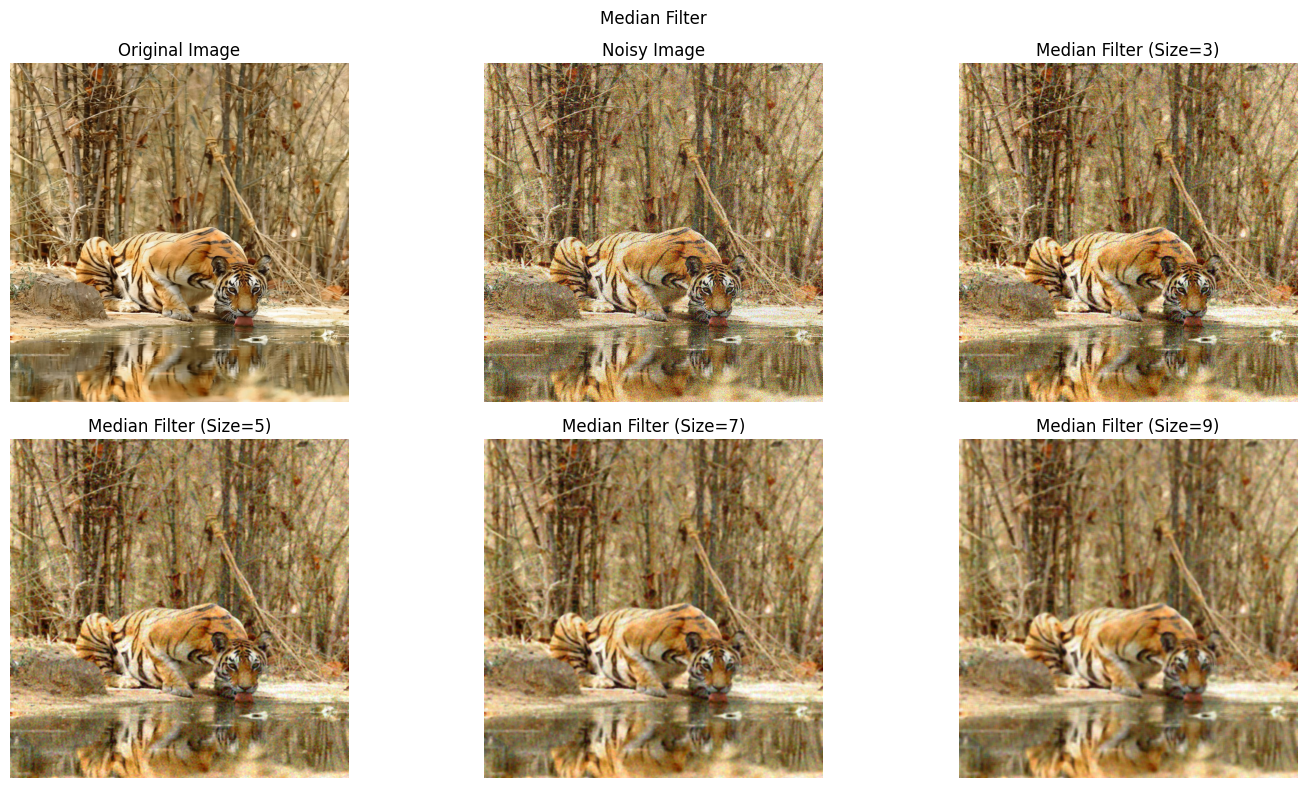

In [31]:
# Visualize the images
plt.figure(figsize=(15, 8))  # Create a figure with specified size

# Convert noisy image to uint8 format
noisy_image_uint8 = (noisy_image * 255).astype(np.uint8)  # Convert noisy image to uint8 format

# Plot the original image
plt.subplot(2, 3, 1)  # Create subplot for original image at position (2, 3, 1)
plt.imshow(np.clip(resized_image, 0, 1))  # Display the original image and clip values to [0, 1]
plt.title('Original Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Plot the noisy image
plt.subplot(2, 3, 2)  # Create subplot for noisy image at position (2, 3, 2)
plt.imshow(np.clip(noisy_image, 0, 1))  # Display the noisy image and clip values to [0, 1]
plt.title('Noisy Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Apply median filter with different filter sizes using cv2.medianBlur()
for i, filter_size in enumerate(filter_sizes, start=1):  # Loop over each filter size
    # Apply the filter using cv2.medianBlur()
    filtered_image = cv2.medianBlur(noisy_image_uint8, filter_size)  # Apply the median filter to the noisy image
    filtered_image = filtered_image.astype('float32') / 255.0  # Convert the filtered image back to float32 format

    # Plot the filtered image
    plt.subplot(2, 3, i + 2)  # Create subplot for filtered image at position (2, 3, i + 2)
    plt.imshow(np.clip(filtered_image, 0, 1))  # Display the filtered image and clip values to [0, 1]
    plt.title(f'Median Filter (Size={filter_size})')  # Set title for the subplot
    plt.axis('off')  # Turn off axis

# Add title to the entire figure
plt.suptitle('Median Filter')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot


3 - Mean Filter:

Purpose: The mean filter, also known as the average filter, is a type of linear digital filtering technique commonly used for reducing noise in images while smoothing out variations in pixel intensity.

Operation: The mean filter works by replacing each pixel value with the average (mean) value of the pixel values within a specified neighborhood (kernel) centered around the pixel being processed. This process helps to reduce high-frequency noise while preserving overall image structure.

Kernel: The mean filter typically uses a square-shaped kernel of odd dimensions (e.g., 3x3, 5x5, 7x7) centered around the pixel being filtered. The size of the kernel determines the size of the neighborhood used to calculate the mean value.

Implementation: To apply the mean filter, the kernel is placed over each pixel in the image, and the pixel values within the kernel are averaged. The resulting average value is then assigned as the new pixel value. This process is repeated for every pixel in the image.

Effect: The mean filter is effective at reducing noise, particularly Gaussian noise, by smoothing out variations in pixel intensity. However, it may also blur edges and fine details in the image, leading to a loss of sharpness.

Applications: The mean filter is commonly used in various image processing tasks, including noise reduction, image smoothing, and preprocessing for subsequent analysis. It is often applied in scenarios where preserving fine details is less critical than reducing noise.

Parameters: The main parameter of the mean filter is the size of the kernel, which determines the size of the neighborhood used for computing the mean value. Larger kernel sizes provide stronger smoothing but may also result in more pronounced blurring.

In summary, the mean filter is a simple yet effective technique for noise reduction and image smoothing in a wide range of image processing applications. It offers a balance between noise reduction and preservation of image details, making it suitable for many practical tasks.

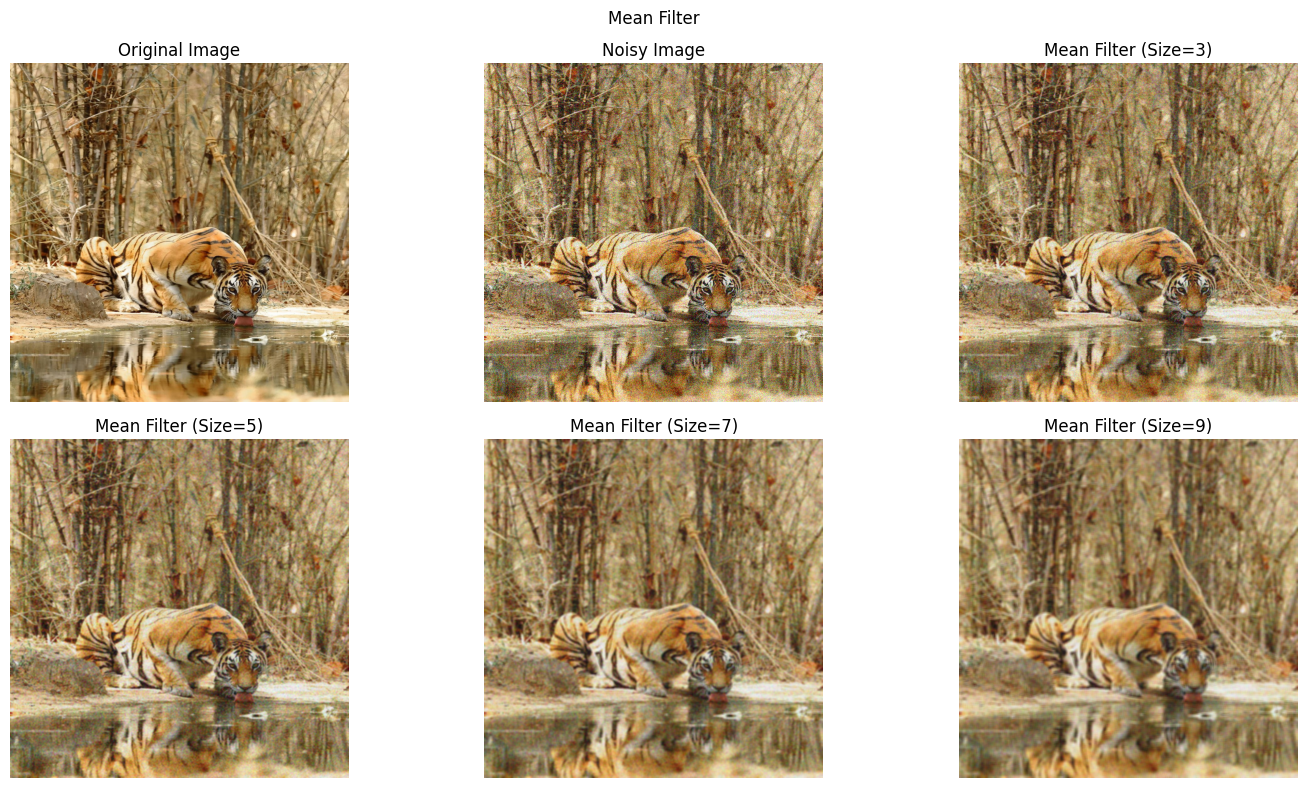

In [32]:
# Visualize the images
plt.figure(figsize=(15, 8))  # Create a figure with specified size

# Plot the original image
plt.subplot(2, 3, 1)  # Create subplot for original image at position (2, 3, 1)
plt.imshow(np.clip(resized_image, 0, 1))  # Display the original image and clip values to [0, 1]
plt.title('Original Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Plot the noisy image
plt.subplot(2, 3, 2)  # Create subplot for noisy image at position (2, 3, 2)
plt.imshow(np.clip(noisy_image, 0, 1))  # Display the noisy image and clip values to [0, 1]
plt.title('Noisy Image')  # Set title for the subplot
plt.axis('off')  # Turn off axis

# Apply mean filter with different filter sizes using cv2.blur()
for i, filter_size in enumerate(filter_sizes, start=1):  # Loop over each filter size
    # Apply the filter using cv2.blur()
    filtered_image = cv2.blur(noisy_image, (filter_size, filter_size))  # Apply the mean filter to the noisy image

    # Plot the filtered image
    plt.subplot(2, 3, i + 2)  # Create subplot for filtered image at position (2, 3, i + 2)
    plt.imshow(np.clip(filtered_image, 0, 1))  # Display the filtered image and clip values to [0, 1]
    plt.title(f'Mean Filter (Size={filter_size})')  # Set title for the subplot
    plt.axis('off')  # Turn off axis

# Add title to the entire figure
plt.suptitle('Mean Filter')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot


4 - Prewitt Filter

The Prewitt filter is a type of edge detection filter used in image processing to detect edges within an image. Here's some information about the Prewitt filter:

Purpose: The Prewitt filter is designed to detect edges in images by calculating the gradient magnitude at each pixel, indicating rapid changes in intensity.

Operation: The Prewitt filter consists of two convolution kernels: one for detecting vertical edges (gradient in the x-direction) and another for detecting horizontal edges (gradient in the y-direction). These kernels are applied to the image to compute the gradient magnitude in both directions.

Kernel Design:

The vertical Prewitt kernel (Prewitt_x) detects changes in intensity along the horizontal axis. It typically looks like:
[-1, 0, 1]
[-1, 0, 1]
[-1, 0, 1]
The horizontal Prewitt kernel (Prewitt_y) detects changes in intensity along the vertical axis. It typically looks like:
[-1, -1, -1]
[0, 0, 0]
[1, 1, 1]
Convolution Operation: The Prewitt filter is applied to the image using convolution. The filter kernels are passed over the image, and at each pixel location, the gradients in the x and y directions are computed by convolving the image with the Prewitt_x and Prewitt_y kernels, respectively.

Gradient Magnitude: The gradient magnitude at each pixel is calculated as the square root of the sum of the squares of the gradients in the x and y directions.

Edge Detection: High gradient magnitudes indicate the presence of edges in the image. By thresholding the gradient magnitudes, edges can be detected and highlighted.

Applications: The Prewitt filter is commonly used for edge detection, feature extraction, and image segmentation tasks in various computer vision applications, including object detection, boundary detection, and image analysis.

Parameters: The Prewitt filter does not have many adjustable parameters. However, the choice of threshold for gradient magnitudes can affect the sensitivity and specificity of edge detection.

In summary, the Prewitt filter is a simple and effective tool for detecting edges in images, providing valuable information for further analysis and processing in various computer vision applications.

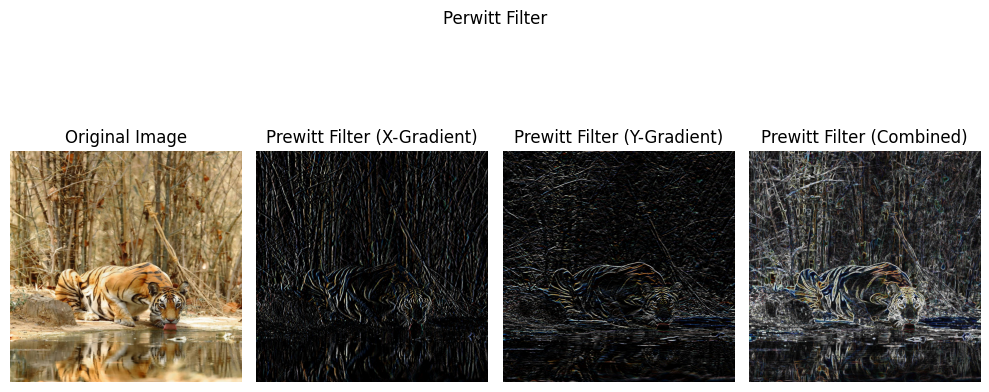

In [33]:
# Define Prewitt filter kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Apply Prewitt filter in the x-direction
filtered_image_x = cv2.filter2D(resized_image, -1, prewitt_x)

# Apply Prewitt filter in the y-direction
filtered_image_y = cv2.filter2D(resized_image, -1, prewitt_y)

# Combine x and y gradients
prewitt_image = np.sqrt(filtered_image_x**2 + filtered_image_y**2)

# Visualize the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 4, 1)
plt.imshow(resized_image)
plt.title('Original Image')
plt.axis('off')

# Plot the x-gradient
plt.subplot(1, 4, 2)
plt.imshow(np.clip(filtered_image_x, 0, 1), cmap='gray')
plt.title('Prewitt Filter (X-Gradient)')
plt.axis('off')

# Plot the y-gradient
plt.subplot(1, 4, 3)
plt.imshow(np.clip(filtered_image_y, 0, 1), cmap='gray')
plt.title('Prewitt Filter (Y-Gradient)')
plt.axis('off')

# Visualize the combined Prewitt image
plt.subplot(1, 4, 4)
plt.imshow(np.clip(prewitt_image, 0.0, 1.0), cmap='gray')
plt.title('Prewitt Filter (Combined)')
plt.axis('off')

plt.suptitle('Perwitt Filter')
plt.tight_layout()
plt.show()



5 - Sobel Filter

The Sobel filter is a popular edge detection filter used in image processing to detect edges within an image. Here's some information about the Sobel filter:

Purpose: The Sobel filter is designed to highlight edges in images by computing the gradient magnitude at each pixel, indicating rapid changes in intensity.

Operation: The Sobel filter performs edge detection by convolving the image with a pair of kernels: one for detecting vertical edges (gradient in the x-direction) and another for detecting horizontal edges (gradient in the y-direction). These kernels are derived from the concept of differentiation.

Kernel Design:

The vertical Sobel kernel (Sobel_x) detects changes in intensity along the horizontal axis. It typically looks like:
[-1, 0, 1]
[-2, 0, 2]
[-1, 0, 1]
The horizontal Sobel kernel (Sobel_y) detects changes in intensity along the vertical axis. It typically looks like:
[-1, -2, -1]
[0, 0, 0]
[1, 2, 1]
Convolution Operation: The Sobel filter applies these kernels to the image using convolution. At each pixel location, the gradients in the x and y directions are computed by convolving the image with the Sobel_x and Sobel_y kernels, respectively.

Gradient Magnitude: The gradient magnitude at each pixel is calculated as the square root of the sum of the squares of the gradients in the x and y directions.

Edge Detection: High gradient magnitudes indicate the presence of edges in the image. By thresholding the gradient magnitudes, edges can be detected and highlighted.

Applications: The Sobel filter is commonly used for edge detection, feature extraction, and image segmentation tasks in various computer vision applications, including object detection, boundary detection, and image analysis.

Parameters: The Sobel filter does not have many adjustable parameters. However, the choice of threshold for gradient magnitudes can affect the sensitivity and specificity of edge detection.

 In summary, the Sobel filter is a widely used tool for detecting edges in images, providing valuable information for further analysis and processing in various computer vision applications.

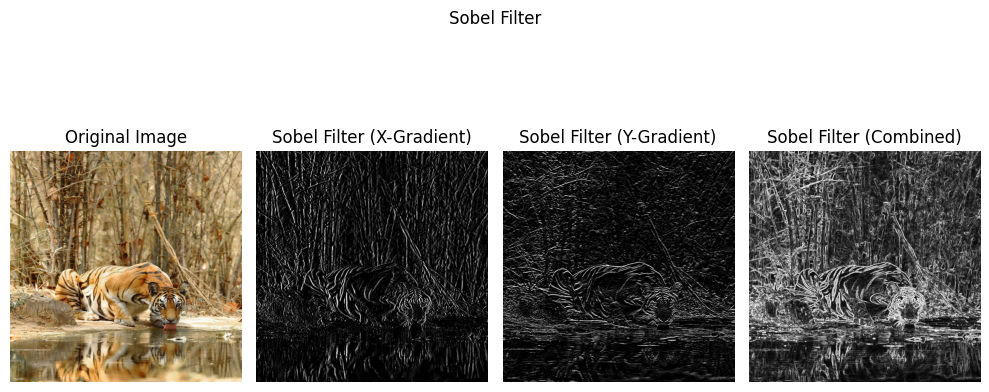

In [34]:
# Convert the resized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

# Apply Sobel filter in the x-direction
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in the y-direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine x and y gradients
sobel_image = np.sqrt(sobel_x**2 + sobel_y**2)

# Visualize the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 4, 1)
plt.imshow(resized_image)
plt.title('Original Image')
plt.axis('off')

# Plot the x-gradient
plt.subplot(1, 4, 2)
plt.imshow(np.clip(sobel_x, 0, 1), cmap='gray')
plt.title('Sobel Filter (X-Gradient)')
plt.axis('off')

# Plot the y-gradient
plt.subplot(1, 4, 3)
plt.imshow(np.clip(sobel_y, 0, 1), cmap='gray')
plt.title('Sobel Filter (Y-Gradient)')
plt.axis('off')

# Visualize the combined Sobel image
plt.subplot(1, 4, 4)
plt.imshow(np.clip(sobel_image, 0.0, 1.0), cmap='gray')
plt.title('Sobel Filter (Combined)')
plt.axis('off')

plt.suptitle('Sobel Filter')
plt.tight_layout()
plt.show()
